# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [1]:
import jupyter
import numpy as np
import cv2
import matplotlib.pyplot as plt
import scipy
import sklearn
import tensorflow
print(cv2.__version__)

import time

3.1.0


In [2]:
"""Load pickled data"""
import pickle

# TODO: fill this in based on where you saved the training and testing data
training_file = '/Users/blakejacquot/Dropbox/MOOCs/Udacity_SelfDrivingCar/Term1/TrafficSignClassifier/traffic-signs-data/train.p'
testing_file = '/Users/blakejacquot/Dropbox/MOOCs/Udacity_SelfDrivingCar/Term1/TrafficSignClassifier/traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [3]:
"""To start off let's do a basic data summary."""

print('X_train shape = ', X_train.shape)
print('y_train shape = ', y_train.shape)
print('X_test shape = ', X_test.shape)
print('y_test shape = ', y_test.shape)
print("Type of X_train = ", type(X_train))
print("Type of y_train = ", type(y_train))

labels = {}
for el in y_train:
    if el in labels.keys():
        labels[el] += 1
    else:
        labels[el] = 1
        
print(labels.keys())
print(len(labels.keys()))

# TODO: number of training examples
n_train = len(y_train)

# TODO: number of testing examples
n_test = len(y_test)

# TODO: what's the shape of an image?
single_image = X_train[0][:][:][:]
image_shape = single_image.shape

# TODO: how many classes are in the dataset
n_classes = len(labels.keys())

print(' ')

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

X_train shape =  (39209, 32, 32, 3)
y_train shape =  (39209,)
X_test shape =  (12630, 32, 32, 3)
y_test shape =  (12630,)
Type of X_train =  <class 'numpy.ndarray'>
Type of y_train =  <class 'numpy.ndarray'>
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42])
43
 
Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

In [5]:
"""Helper functions for data categorization and exploration"""

def make_class_dict(y):
    class_dict = {}
    num_el = len(y)
    for i in range(num_el):
        curr_class = y[i]
        if curr_class not in class_dict.keys():
            class_dict[curr_class] = [i]
        else:
            pos_index = class_dict[curr_class]
            pos_index.append(i)
            class_dict[curr_class] = pos_index
    return class_dict


import random
def plot_random(X, class_dict):
    for curr_class in class_dict.keys():
        pos_index = class_dict[curr_class]
        len_index = len(pos_index)
        i1 = random.randrange(len_index)
        i2 = random.randrange(len_index)
        i3 = random.randrange(len_index)
        print('Current class = ' + str(curr_class))
        index1 = pos_index[i1]
        index2 = pos_index[i2]
        index3 = pos_index[i3]
        im1 = X[index1][:][:][:]
        im2 = X[index2][:][:][:]
        im3 = X[index3][:][:][:]
        plt.figure()
        plt.subplot(131)
        plt.imshow(im1)
        plt.subplot(132)
        plt.imshow(im2)
        plt.subplot(133)
        plt.imshow(im3)
        plt.show() 
    plt.close("all")
    


Current class = 0


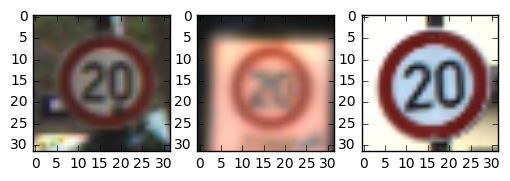

Current class = 1


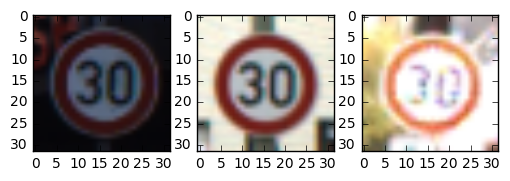

Current class = 2


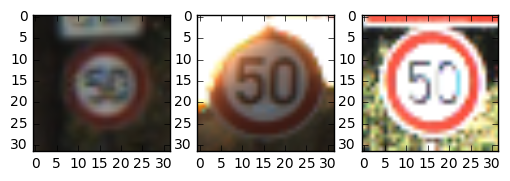

Current class = 3


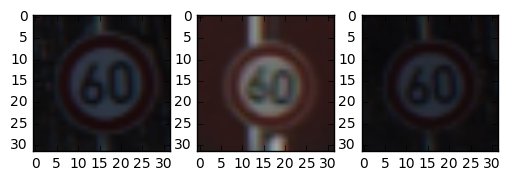

Current class = 4


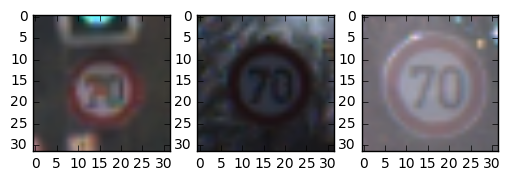

Current class = 5


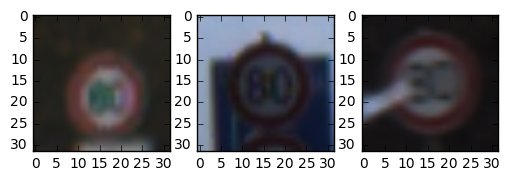

Current class = 6


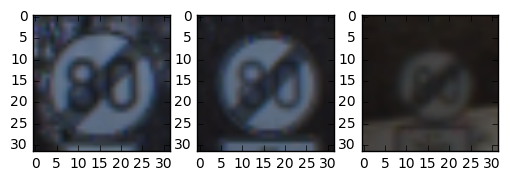

Current class = 7


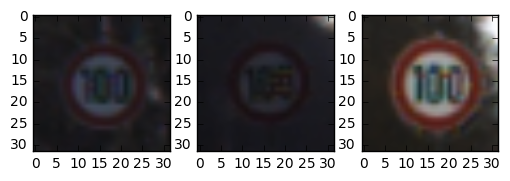

Current class = 8


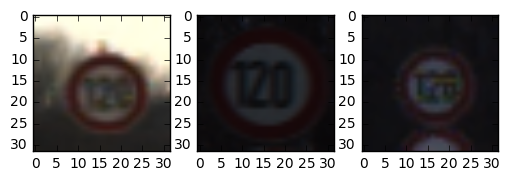

Current class = 9


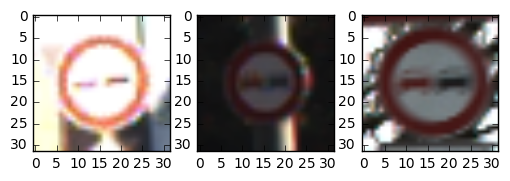

Current class = 10


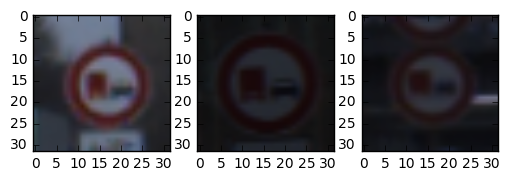

Current class = 11


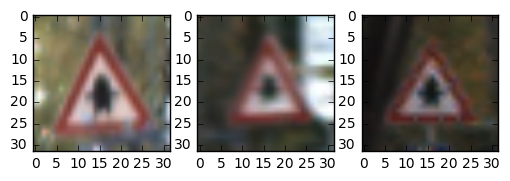

Current class = 12


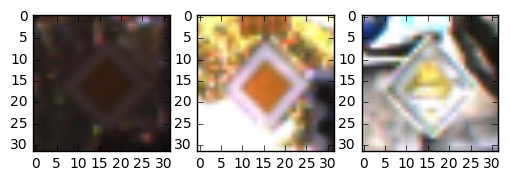

Current class = 13


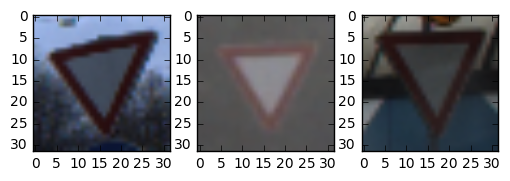

Current class = 14


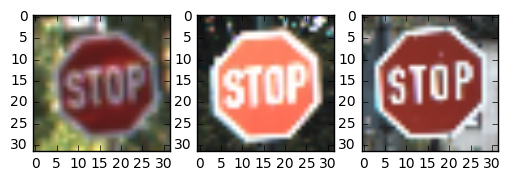

Current class = 15


KeyboardInterrupt: 

In [15]:
"""Organize images and display random ones from each class"""

class_dict_train = make_class_dict(y_train)
class_dict_test = make_class_dict(y_test)

plot_random(X_train, class_dict_train)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [6]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

In [19]:
"""Import modules"""
import jupyter
import numpy as np
import cv2
import matplotlib.pyplot as plt
import scipy
import sklearn
import tensorflow

import math
import random


In [20]:
"""Helper functions from Project 1"""
def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def get_ROI(img, vertices):
    pass

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    
    Args:
      img:
      vertices:
    
    Returns:
      
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns 
      line_img: Image with hough lines drawn.
      lines: Hough lines from the transform of form x1,y1,x2,y2.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    return lines
                
def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    """
    Args:
      img: Output of the hough_lines(), An image with lines drawn on it.
           Should be a blank image (all black) with lines drawn on it.
      initial_img: image before any processing.
      α: TBD
      β: TBD
      λ: TBD
      
    The result image is computed as follows:
    
    initial_img * α + img * β + λ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, α, img, β, λ)




In [21]:
"""Helper functions for data categorization, preprocessing, and exploration"""
def make_class_dict(y):
    class_dict = {}
    num_el = len(y)
    for i in range(num_el):
        curr_class = y[i]
        if curr_class not in class_dict.keys():
            class_dict[curr_class] = [i]
        else:
            pos_index = class_dict[curr_class]
            pos_index.append(i)
            class_dict[curr_class] = pos_index
    return class_dict

def plot_random(X, class_dict):
    for curr_class in class_dict.keys():
        pos_index = class_dict[curr_class]
        len_index = len(pos_index)
        i1 = random.randrange(len_index)
        i2 = random.randrange(len_index)
        i3 = random.randrange(len_index)
        print('Current class = ' + str(curr_class))
        index1 = pos_index[i1]
        index2 = pos_index[i2]
        index3 = pos_index[i3]
        im1 = X[index1][:][:][:]
        im2 = X[index2][:][:][:]
        im3 = X[index3][:][:][:]
        plt.figure()
        plt.subplot(131)
        plt.imshow(im1, cmap='Greys_r')
        plt.subplot(132)
        plt.imshow(im2, cmap='Greys_r')
        plt.subplot(133)
        plt.imshow(im3, cmap='Greys_r')
        plt.show()
        mean_im1, max_im1 = np.mean(im1), np.max(im1)
        mean_im2, max_im2 = np.mean(im2), np.max(im2)
        mean_im3, max_im3 = np.mean(im3), np.max(im3)
        print('Mean of im1,2,3 = ', mean_im1, mean_im2, mean_im3)
        print('Max of im1,2,3 = ', max_im1, max_im2, max_im3)
    plt.close("all")

def make_grayscale(x):
    x_shape = x.shape
    print(x_shape)
    num_el = x_shape[0]
    ret_images = np.ones((x_shape[0],x_shape[1],x_shape[2]))
    print(ret_images.shape)
    for i in range(num_el):
        curr_im = x[i][:][:][:]
        ret_images[i][:][:] = grayscale(curr_im)
    return ret_images

def make_gaussian_blur(x, kernel_size):
    x_shape = x.shape
    print(x_shape)
    num_el = x_shape[0]
    ret_images = np.ones((x_shape[0],x_shape[1],x_shape[2]))
    print(ret_images.shape)
    for i in range(num_el):
        curr_im = x[i][:][:][:]
        ret_images[i][:][:] = gaussian_blur(curr_im, kernel_size)
    return ret_images

def crop_to_ROI(x, vertices):
    x_shape = x.shape
    print(x_shape)
    num_el = x_shape[0]
    ret_images = np.ones((x_shape[0],x_shape[1],x_shape[2]))
    print(ret_images.shape)
    for i in range(num_el):
        curr_im = x[i][:][:][:]
        ret_images[i][:][:] = get_ROI(curr_im, vertices)
    return ret_images

def normalize(x):
    x_shape = x.shape
    print(x_shape)
    num_el = x_shape[0]
    ret_images = np.ones((x_shape[0],x_shape[1],x_shape[2]))
    print(ret_images.shape)
    for i in range(num_el):
        curr_im = x[i][:][:][:]
        empty_im = np.ones((x_shape[1],x_shape[2]))
        ret_images[i][:][:] = cv2.normalize(curr_im, empty_im, 0,255,cv2.NORM_MINMAX)
    return ret_images    

In [22]:
"""Organize datasets into dictionaries"""
class_dict_train = make_class_dict(y_train)
class_dict_test = make_class_dict(y_test)

In [23]:
"""Preprocess datasets"""
X_test_preproc = X_test
X_test_preproc = make_grayscale(X_test_preproc)
X_test_preproc = make_gaussian_blur(X_test_preproc, 1)
X_test_preproc = normalize(X_test_preproc)

X_train_preproc = X_train
X_train_preproc = make_grayscale(X_train_preproc)
X_train_preproc = make_gaussian_blur(X_train_preproc, 1)
X_train_preproc = normalize(X_train_preproc)

(12630, 32, 32, 3)
(12630, 32, 32)
(12630, 32, 32)
(12630, 32, 32)
(12630, 32, 32)
(12630, 32, 32)
(39209, 32, 32, 3)
(39209, 32, 32)
(39209, 32, 32)
(39209, 32, 32)
(39209, 32, 32)
(39209, 32, 32)


Current class = 0


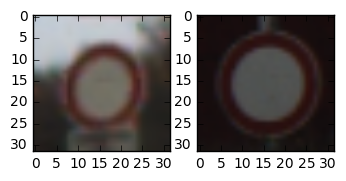

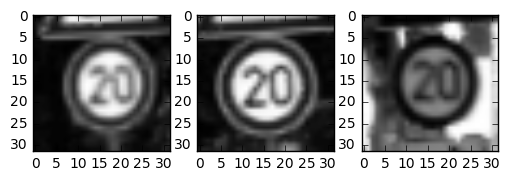

Mean of im1,2,3 =  61.3084253772 67.2219109786 87.2451982123
Max of im1,2,3 =  255.0 255.0 255.0
Current class = 1


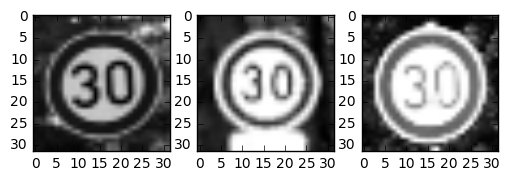

Mean of im1,2,3 =  65.2367621528 110.930363582 115.935392894
Max of im1,2,3 =  255.0 255.0 255.0
Current class = 2


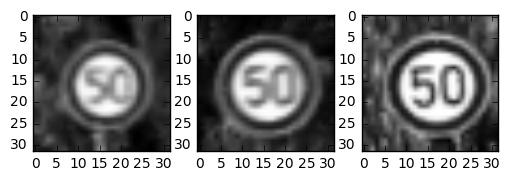

Mean of im1,2,3 =  63.6764248935 64.2209791101 85.741811899
Max of im1,2,3 =  255.0 255.0 255.0
Current class = 3


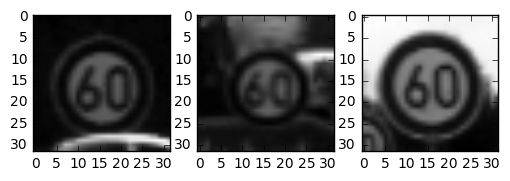

Mean of im1,2,3 =  28.7915039062 36.2125355114 100.549039794
Max of im1,2,3 =  255.0 255.0 255.0
Current class = 4


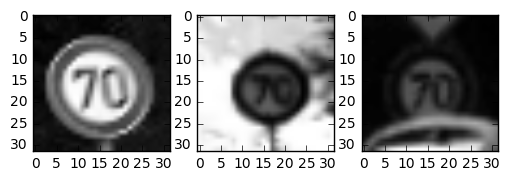

Mean of im1,2,3 =  68.319659385 157.488120919 35.9455754207
Max of im1,2,3 =  255.0 255.0 255.0
Current class = 5


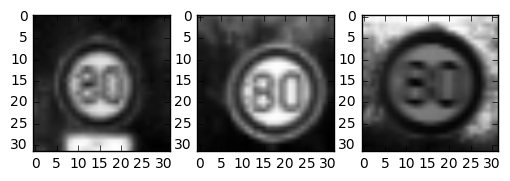

Mean of im1,2,3 =  52.7160644531 64.4412781762 78.5455137311
Max of im1,2,3 =  255.0 255.0 255.0
Current class = 6


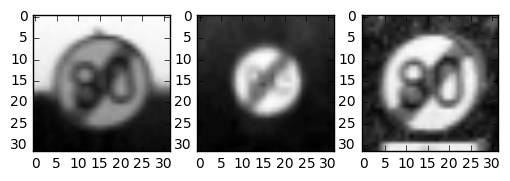

Mean of im1,2,3 =  110.011858259 50.9136199951 89.9896918403
Max of im1,2,3 =  255.0 255.0 255.0
Current class = 7


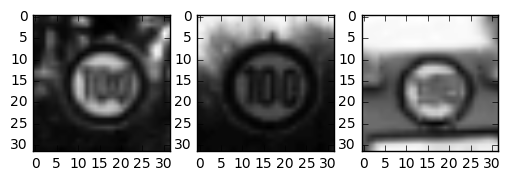

Mean of im1,2,3 =  44.1929732922 57.5983001374 125.841409935
Max of im1,2,3 =  255.0 255.0 255.0
Current class = 8


KeyboardInterrupt: 

In [22]:
"""Examine datasets"""
plot_random(X_test_preproc, class_dict_test)

In [24]:
"""Helper Functions"""

import numpy as np
def make_grayscale(x):
    x_shape = x.shape
    num_el = x_shape[0]
    ret_images = np.ones((x_shape[0],x_shape[1],x_shape[2]))
    for i in range(num_el):
        curr_im = x[i][:][:][:]
        r = curr_im[:,:,0]
        b = curr_im[:,:,1]
        g = curr_im[:,:,2]
        curr_im_gray = (r) / 3
        ret_images[i][:][:] = curr_im_gray
    return ret_images


def randomize_set(x,y):
    numel = len(y)
    print(type(x), type(y))
    print(x.shape, y.shape)
    listicle = [[i] for i in range(numel)]
    random.shuffle(listicle)
    x_shape = x.shape
    y_shape = y.shape
    ret_x = np.ones((x_shape[0],x_shape[1],x_shape[2]))
    ret_y = np.ones((x_shape[0]))
    print(ret_x.shape, ret_y.shape)
    for i in range(numel):
        index = listicle[i]
        curr_x = x[index,:,:]
        curr_y = y[index]
        ret_x[i,:,:] = curr_x
        ret_y[i] = curr_y
        #print(index)
    return(ret_x,ret_y)

def make_one_hot_encoding(y, num_labels):
    print('Making one hot encoding')
    print(type(y), type(num_labels))
    print(y.shape, num_labels)
    y_shape = y.shape
    numel = y_shape[0]
    print(numel)
    #for i in range(numel):
    ret_y = np.zeros((numel, num_labels))
    print('Return y = ', ret_y.shape)
    for i in range(numel):
        curr_label = y[i]
        #print(i, curr_label)
        curr_encoding = np.zeros(num_labels)
        for j in range(num_labels):
            if j == int(curr_label):
                #print('Match!', j, curr_label)
                curr_encoding[j] = 1.0
        #print(curr_encoding)
        ret_y[i] = curr_encoding        
    return ret_y

def expand_x(x):
    shape_x = x.shape
    print('Length is = ', len(shape_x))
    if len(shape_x) == 3:
        print('Expanding')
        ret_x = np.empty((shape_x[0],shape_x[1],shape_x[2],1))
        ret_x[:,:,:,0] = x
        print(ret_x.shape)
        print('Example value = ', ret_x[0,0,0,0])
    return(ret_x)


In [25]:
"""Format training and test data"""
X_test_gray = make_grayscale(X_test)
X_train_gray = make_grayscale(X_train)
[X_test_shuff, y_test_shuff] = randomize_set(X_test_gray, y_test)
[X_train_shuff, y_train_shuff] = randomize_set(X_train_gray, y_train)
print(X_test_shuff.shape, y_test_shuff.shape)
print(X_train_shuff.shape, y_train_shuff.shape)
print(type(X_test_shuff), type(y_test_shuff))
print(type(X_train_shuff), type(y_train_shuff))
y_shuff_onehot_test = make_one_hot_encoding(y_test_shuff, 43)
y_shuff_onehot_train = make_one_hot_encoding(y_train_shuff, 43)
print(y_shuff_onehot_test.shape, y_shuff_onehot_train.shape)
training_data = expand_x(X_train_shuff)
training_labels = y_shuff_onehot_train
test_data = expand_x(X_test_shuff)
test_labels = y_shuff_onehot_test
print(' ')
print('Type of training data = ', type(training_data))
print('Type of training labels = ', type(training_labels))
print('Shape of training labels = ', training_labels.shape)
print('Shape of training data = ', training_data.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(12630, 32, 32) (12630,)
(12630, 32, 32) (12630,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(39209, 32, 32) (39209,)
(39209, 32, 32) (39209,)
(12630, 32, 32) (12630,)
(39209, 32, 32) (39209,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
Making one hot encoding
<class 'numpy.ndarray'> <class 'int'>
(12630,) 43
12630
Return y =  (12630, 43)
Making one hot encoding
<class 'numpy.ndarray'> <class 'int'>
(39209,) 43
39209
Return y =  (39209, 43)
(12630, 43) (39209, 43)
Length is =  3
Expanding
(39209, 32, 32, 1)
Example value =  22.6666666667
Length is =  3
Expanding
(12630, 32, 32, 1)
Example value =  56.0
 
Type of training data =  <class 'numpy.ndarray'>
Type of training labels =  <class 'numpy.ndarray'>
Shape of training labels =  (39209, 43)
Shape of training data =  (39209, 32, 32, 1)


In [30]:
"""Neural Network helper functions"""

def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.tanh(x)


def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='SAME')

# Create model
def conv_net(x, weights, biases):
    # Layer 1
    conv1 = conv2d(x, weights['layer_1'], biases['layer_1'])
    conv1 = maxpool2d(conv1)

    # Layer 2
    conv2 = conv2d(conv1, weights['layer_2'], biases['layer_2'])
    conv2 = maxpool2d(conv2)

    # Layer 3
    conv3 = conv2d(conv2, weights['layer_3'], biases['layer_3'])
    conv3 = maxpool2d(conv2)

    # Fully connected layer
    # Reshape conv3 output to fit fully connected layer input
    fc1 = tf.reshape(
        conv3,
        [-1, weights['fully_connected'].get_shape().as_list()[0]])
    fc1 = tf.add(
        tf.matmul(fc1, weights['fully_connected']),
        biases['fully_connected'])
    fc1 = tf.nn.tanh(fc1)

    # Output Layer - class prediction
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

In [31]:
# Create TensorFlow object called tensor
hello_constant = tf.constant('Hello World!')

with tf.Session() as sess:
    # Run the tf.constant operation in the session
    output = sess.run(hello_constant)
    print(output)

b'Hello World!'


Time for last epoch =  5


In [37]:
import time
import tensorflow as tf

# Parameters
learning_rate = 0.001
batch_size = 128
training_epochs = 100

n_input = 1024  # Data input taps. 32 * 32 = 1024
n_classes = 43  # Total classes

layer_width = {
    'layer_1': 32,
    'layer_2': 64,
    'layer_3': 128,
    'fully_connected': 512
}

# Set up data
training_data = expand_x(X_train_shuff)
training_labels = y_shuff_onehot_train
total_samples = len(training_labels)

test_data = expand_x(X_test_shuff)
test_labels = y_shuff_onehot_test

# Store layers weight & bias
weights = {
    'layer_1': tf.Variable(tf.truncated_normal(
        [5, 5, 1, layer_width['layer_1']])),
    'layer_2': tf.Variable(tf.truncated_normal(
        [5, 5, layer_width['layer_1'], layer_width['layer_2']])),
    'layer_3': tf.Variable(tf.truncated_normal(
        [5, 5, layer_width['layer_2'], layer_width['layer_3']])),
    'fully_connected': tf.Variable(tf.truncated_normal(
        [1024, layer_width['fully_connected']])),
    'out': tf.Variable(tf.truncated_normal(
        [layer_width['fully_connected'], n_classes]))
}

biases = {
    'layer_1': tf.Variable(tf.zeros(layer_width['layer_1'])),
    'layer_2': tf.Variable(tf.zeros(layer_width['layer_2'])),
    'layer_3': tf.Variable(tf.zeros(layer_width['layer_3'])),
    'fully_connected': tf.Variable(tf.zeros(layer_width['fully_connected'])),
    'out': tf.Variable(tf.zeros(n_classes))
}

# tf Graph input
x = tf.placeholder("float", [None, 32, 32, 1])
y = tf.placeholder("float", [None, n_classes])

logits = conv_net(x, weights, biases)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)\
    .minimize(cost)


# Initializing the variables
init = tf.initialize_all_variables()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    
    # Training cycle
    print('Starting first epoch')
    for epoch in range(training_epochs):
        start_time = time.time()        
        total_batch = int(total_samples/batch_size)

        # Loop over all batches
        for i in range(total_batch):
            batch_x = training_data[i*batch_size:i*batch_size+batch_size,:,:]
            batch_y = training_labels[i*batch_size:i*batch_size+batch_size]            
            
            # Run optimization op (backprop) and cost op (to get loss value)
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})

        # Display logs per epoch step
        c = sess.run(cost, feed_dict={x: batch_x, y: batch_y})
        print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c))
        elapsed_time = time.time() - start_time
        print('Time for last epoch (sec) = ', int(elapsed_time))
    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
    
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print(
        "Accuracy:",
        accuracy.eval({x: test_data, y: test_labels}))

Length is =  3
Expanding
(39209, 32, 32, 1)
Example value =  22.6666666667
Length is =  3
Expanding
(12630, 32, 32, 1)
Example value =  56.0
Epoch: 0001 cost= 14.967689514
Time for last epoch (sec) =  128
Epoch: 0002 cost= 7.793766022
Time for last epoch (sec) =  129


KeyboardInterrupt: 

### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**

In [5]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

In [6]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [7]:
### Train your model here.
### Feel free to use as many code cells as needed.

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [3]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

In [4]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [3]:

"""
THE EXAMPLE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
THE EXAMPLE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
THE EXAMPLE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
THE EXAMPLE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
THE EXAMPLE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
THE EXAMPLE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
THE EXAMPLE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
THE EXAMPLE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
THE EXAMPLE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
THE EXAMPLE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
THE EXAMPLE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
THE EXAMPLE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
THE EXAMPLE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

"""

from tensorflow.examples.tutorials.mnist import input_data
print('Input data is of type = ', type(input_data))
mnist = input_data.read_data_sets(".", one_hot=True, reshape=False)

import tensorflow as tf

# Parameters
learning_rate = 0.001
batch_size = 128
training_epochs = 1 # 30

n_input = 784  # Data input taps. 32 * 32 = 
n_classes = 10  # MNIST total classes (0-9 digits)


print('learning_rate = ', learning_rate)
print('batch_size = ', batch_size)
print('training_epochs = ', training_epochs)
print('n_input = ', n_input)
print('n_classes = ', n_classes)

layer_width = {
    'layer_1': 32,
    'layer_2': 64,
    'layer_3': 128,
    'fully_connected': 512
}

# Store layers weight & bias
weights = {
    'layer_1': tf.Variable(tf.truncated_normal(
        [5, 5, 1, layer_width['layer_1']])),
    'layer_2': tf.Variable(tf.truncated_normal(
        [5, 5, layer_width['layer_1'], layer_width['layer_2']])),
    'layer_3': tf.Variable(tf.truncated_normal(
        [5, 5, layer_width['layer_2'], layer_width['layer_3']])),
    'fully_connected': tf.Variable(tf.truncated_normal(
        [1024, layer_width['fully_connected']])),
    'out': tf.Variable(tf.truncated_normal(
        [layer_width['fully_connected'], n_classes]))
}

biases = {
    'layer_1': tf.Variable(tf.zeros(layer_width['layer_1'])),
    'layer_2': tf.Variable(tf.zeros(layer_width['layer_2'])),
    'layer_3': tf.Variable(tf.zeros(layer_width['layer_3'])),
    'fully_connected': tf.Variable(tf.zeros(layer_width['fully_connected'])),
    'out': tf.Variable(tf.zeros(n_classes))
}


def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.tanh(x)


def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='SAME')

# Create model
def conv_net(x, weights, biases):
    # Layer 1
    conv1 = conv2d(x, weights['layer_1'], biases['layer_1'])
    conv1 = maxpool2d(conv1)

    # Layer 2
    conv2 = conv2d(conv1, weights['layer_2'], biases['layer_2'])
    conv2 = maxpool2d(conv2)

    # Layer 3
    conv3 = conv2d(conv2, weights['layer_3'], biases['layer_3'])
    conv3 = maxpool2d(conv2)

    # Fully connected layer
    # Reshape conv3 output to fit fully connected layer input
    fc1 = tf.reshape(
        conv3,
        [-1, weights['fully_connected'].get_shape().as_list()[0]])
    fc1 = tf.add(
        tf.matmul(fc1, weights['fully_connected']),
        biases['fully_connected'])
    fc1 = tf.nn.tanh(fc1)

    # Output Layer - class prediction
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

# tf Graph input
x = tf.placeholder("float", [None, 28, 28, 1])
y = tf.placeholder("float", [None, n_classes])

logits = conv_net(x, weights, biases)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)\
    .minimize(cost)


# Initializing the variables
init = tf.initialize_all_variables()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)  
            print(' ')
            print('Shape of batch x = ', batch_x.shape, type(batch_x))
            print('batch_x[0,1,1,0] = ', print(batch_x[0,1,1,0]))
            print('Shape of batch y = ', batch_y.shape, type(batch_y))
            print('Example values of y = ', batch_y[0], batch_y[1],batch_y[2])
            j = 1
            xj = batch_x[j,:,:,:]
            yj = batch_y[j,:]
            print('Shape of batch xj = ', xj.shape, type(xj))
            print('Shape of batch yj = ', yj.shape, type(yj))            
            x0 = x[0,:,:,:]
            y0 = y[0,:]
            print('x0, y0 = ', x0, y0)
            yj_shape = yj.shape
            print(yj[:])
            plt.figure()
            #plt.imshow(im1, cmap='Greys_r')
            plt.imshow(xj[:,:,0])
            plt.show()
            # Run optimization op (backprop) and cost op (to get loss value)
            
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
        # Display logs per epoch step
        c = sess.run(cost, feed_dict={x: batch_x, y: batch_y})
        print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c))
    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print(
        "Accuracy:",
        accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Input data is of type =  <class 'module'>
Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz
learning_rate =  0.001
batch_size =  128
training_epochs =  1
n_input =  784
n_classes =  10
 
Shape of batch x =  (128, 28, 28, 1) <class 'numpy.ndarray'>
0.0
batch_x[0,1,1,0] =  None
Shape of batch y =  (128, 10) <class 'numpy.ndarray'>
Example values of y =  [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.] [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.] [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
Shape of batch xj =  (28, 28, 1) <class 'numpy.ndarray'>
Shape of batch yj =  (10,) <class 'numpy.ndarray'>
x0, y0 =  Tensor("Squeeze_4:0", shape=(28, 28, 1), dtype=float32) Tensor("Squeeze_5:0", shape=(10,), dtype=float32)
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


NameError: name 'plt' is not defined